<a href="https://colab.research.google.com/github/SATHWIK123423/Colab_notebooks/blob/main/NETWORK_INTRUSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision
import math
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import sys
import csv
from torchsummary import summary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class data(Dataset):
  def __init__(self):
    trdata=pd.read_csv('/content/drive/MyDrive/NETWORK_INSTRUSION/Train_data.csv')
    xy=trdata.iloc[:,:].values
    labelen_xy=LabelEncoder()
    xy[:,1]=labelen_xy.fit_transform(xy[:,1])
    xy[:,2]=labelen_xy.fit_transform(xy[:,2])
    xy[:,3]=labelen_xy.fit_transform(xy[:,3])
    xy[:,41]=labelen_xy.fit_transform(xy[:,41])
    xy=xy.astype('float32')
    m=MinMaxScaler()
    xy=m.fit_transform(xy)
    self.x=torch.from_numpy(xy[:,0:40])
    self.y=torch.from_numpy(xy[:,[41]])
    self.y=self.y.long()
    t_o=torch.zeros(len(self.y),2)
    self.y=t_o.scatter_(1,self.y,1.0)
    self.XY=pd.DataFrame(xy)
    self.n_samples=xy.shape[0]
    
  def __getitem__(self,index):
    return self.x[index],self.y[index]
  def __len__(self):
    return self.n_samples
dataset=data()
first_data=dataset[0]
features,labels=first_data
print(features,labels)


tensor([0.0000e+00, 5.0000e-01, 2.9231e-01, 9.0000e-01, 1.2863e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9608e-03, 1.9608e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 5.8824e-01, 9.8039e-02, 1.7000e-01, 3.0000e-02, 1.7000e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e-02]) tensor([0., 1.])


to test one hot encoding

In [ ]:
t=dataset.y.long()
#print(t)
p=t.unique()
#print(p)
#print(len(p))
#print("&&",t.shape)
t_o=torch.zeros(len(t),2)
#print(t_o)
#print(t_o.shape)
p=t.unsqueeze(1)
print(p.shape)
print(p)
r=t_o.scatter_(1,t,1.0)
print(r)

torch.Size([25192, 1, 2])
tensor([[[0, 1]],

        [[0, 1]],

        [[1, 0]],

        ...,

        [[1, 0]],

        [[1, 0]],

        [[1, 0]]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [1., 1.],
        [1., 1.],
        [1., 1.]])


In [ ]:
len(dataset.x)

25192

In [ ]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.15, random_state=42)
train_loader=DataLoader(dataset=train_dataset,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,shuffle=True)


In [ ]:
train_loader=DataLoader(dataset=train_dataset,shuffle=True,batch_size=64)
test_loader=DataLoader(dataset=test_dataset,shuffle=True,batch_size=63)

FEATURE SELECTION USING AUTO ENCODER

In [ ]:

from torch.distributions import Normal
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 
from torchvision.utils import make_grid
import torchvision.transforms as transforms
from tqdm import tqdm
from torchvision.utils import save_image


In [ ]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
host=torch.device('cpu')

cpu


In [ ]:
from torch.nn.modules.activation import Sigmoid
class autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(nn.Linear(40,20),
                               nn.ReLU(),
                               nn.Linear(20,9),
                               nn.ReLU(),
                               nn.Linear(9,10)
                                         
                                        )
    self.decoder=nn.Sequential(nn.Linear(10,9),
                               nn.ReLU(),
                               nn.Linear(9,20),
                               nn.ReLU(),
                               nn.Linear(20,40),
                               nn.Sigmoid()
                                        )
  def forward(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded
  def geten(self,x):
    encoded=self.encoder(x)
    return encoded

  
    

In [ ]:
model=autoencoder().to(device)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001,weight_decay=1e-5)

In [ ]:
summary(model.to(device),(64,40))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 64, 20]             820
              ReLU-2               [-1, 64, 20]               0
            Linear-3                [-1, 64, 9]             189
              ReLU-4                [-1, 64, 9]               0
            Linear-5               [-1, 64, 10]             100
            Linear-6                [-1, 64, 9]              99
              ReLU-7                [-1, 64, 9]               0
            Linear-8               [-1, 64, 20]             200
              ReLU-9               [-1, 64, 20]               0
           Linear-10               [-1, 64, 40]             840
          Sigmoid-11               [-1, 64, 40]               0
Total params: 2,248
Trainable params: 2,248
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/back

In [ ]:
for d,w in train_loader:
  print(d)
  print("@@@")
  print(len(d[0]))
  d=d.to(device)
  y=model(d)
  print("*****")
  print(y)
  break

tensor([[0.0000e+00, 5.0000e-01, 3.3846e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 5.0000e-01, 7.0769e-01,  ..., 1.0000e+00, 1.0000e+00,
         0.0000e+00],
        [0.0000e+00, 5.0000e-01, 3.3846e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [9.3323e-05, 5.0000e-01, 2.9231e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 5.0000e-01, 1.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         0.0000e+00],
        [0.0000e+00, 5.0000e-01, 3.3846e-01,  ..., 0.0000e+00, 0.0000e+00,
         3.0000e-02]])
@@@
40
*****
tensor([[0.5001, 0.5039, 0.4943,  ..., 0.5315, 0.4842, 0.5407],
        [0.5001, 0.5044, 0.4943,  ..., 0.5317, 0.4844, 0.5405],
        [0.5001, 0.5040, 0.4944,  ..., 0.5316, 0.4842, 0.5407],
        ...,
        [0.5000, 0.5039, 0.4944,  ..., 0.5315, 0.4842, 0.5407],
        [0.5002, 0.5043, 0.4942,  ..., 0.5317, 0.4842, 0.5406],
        [0.5001, 0.5039, 0.4944,  ..., 0.5315, 0.4842, 0.5

AUTOENCODER TRAINING

In [ ]:
nepoch=50
output=[]
ls=[]
lo=0
i=0
for epoch in range (nepoch):
  lo=0
  i=0
  for d,w in train_loader:
    i+=1
    d = d.to(device)
    o=model.forward(d)
    loss=criterion(o,d)
    lo+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  lo=lo/i
  ls.append(lo)
  if(epoch%5==0):
    print(f'Epoch:{epoch},Loss:{lo:.4f}')



  

Epoch:0,Loss:0.0835
Epoch:5,Loss:0.0141
Epoch:10,Loss:0.0096
Epoch:15,Loss:0.0080
Epoch:20,Loss:0.0073
Epoch:25,Loss:0.0054
Epoch:30,Loss:0.0048
Epoch:35,Loss:0.0044
Epoch:40,Loss:0.0040
Epoch:45,Loss:0.0037


TO SAVE THE MODEL(EASY WAY)

In [ ]:
torch.save(model,'/content/drive/MyDrive/NETWORK_INSTRUSION/MODEL/model.ptf')


In [ ]:
model=torch.load('/content/drive/MyDrive/NETWORK_INSTRUSION/MODEL/model.ptf')


In [ ]:
model.eval()

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=40, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=9, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=9, bias=True)
    (1): ReLU()
    (2): Linear(in_features=9, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=40, bias=True)
    (5): Sigmoid()
  )
)

TO SAVE

In [ ]:
print(test_dataset[0][0])

tensor([0.0000e+00, 0.0000e+00, 2.1538e-01, 9.0000e-01, 2.7036e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3529e-02, 2.3529e-02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])


ENCODER VALUE

In [ ]:
class mainm(nn.Module):
  def __init__(self):
    super().__init__()
    self.sath=nn.Sequential(nn.Linear(10,25),
                         nn.ReLU(),
                         nn.Linear(25,40),
                         nn.ReLU(),
                         nn.Linear(40,30),
                         nn.ReLU(),
                         nn.Linear(30,30),
                         nn.ReLU(),
                         nn.Linear(30,30),
                         nn.ReLU(),
                         nn.Linear(30,30),
                         nn.ReLU(),
                         nn.Linear(30,10),
                         nn.ReLU(),
                         nn.Linear(10,5),
                         nn.ReLU(),
                         nn.Linear(5,2),
                         nn.Softmax() 
                                        )
   
  def forward(self,x):
    out=self.sath(x)
    return out

In [ ]:
class mainmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.sath=nn.Sequential(nn.Linear(10,20),
                         nn.ReLU(),
                         nn.Linear(20,10),
                         nn.ReLU(),
                         nn.Linear(10,10),
                         nn.ReLU(),
                         nn.Linear(10,6),
                         nn.ReLU(),
                         nn.Linear(6,2)
                         ,
                         nn.Sigmoid()
                                         
                                        )
   
  def forward(self,x):
    out=self.sath(x)
    return out

In [ ]:
mmodel=mainm().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(mmodel.parameters(),lr=0.001,weight_decay=0.000001)

TRAINING THE MAIN MODEL

In [ ]:
print(train_dataset[0][1])

tensor([1., 0.])


In [ ]:
def accuracy(outputs, labels):
    preds = torch.max(outputs,dim=1)
    L=torch.max(labels,dim=1)
    return torch.tensor(torch.sum(preds[1] == L[1]).item() / len(preds[1]))*100

In [ ]:
nepoch=300
output=[]
plottr=[]
plotts=[]
losstr=[]
lossts=[]
lss=0
acc=0
for epoch in range (nepoch):
  acc=0
  lss=0
  i=0
  for d,w in train_loader:
    i+=1
    d = d.to(device)
    w = w.to(device)
    l=model.geten(d)
    o=mmodel(l)
    loss=criterion(o,w)
    lss+=loss
    acc+=accuracy(o,w)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  lss=lss/i
  acc=acc/i
  plottr.append(acc)
  losstr.append(lss)
  if((epoch+1)%5==0):
    print(f'Epoch:{epoch},Loss:{loss.item():.4f},TRAIN_ACCURACY:{acc}% lenght={len(w)}')
  i=0
  acc=0
  lss=0
  for d,w in test_loader:
    i+=1
    d = d.to(device)
    w = w.to(device)
   
    l=model.geten(d)
   
    o=mmodel(l)
    loss=criterion(o,w)
    lss+=loss
    acc+=accuracy(o,w)
  lss=lss/i
  acc=acc/i
  lossts.append(lss)
  plotts.append(acc)
  if((epoch+1)%5==0):
    print(f'Epoch:{epoch},Loss:{loss.item():.4f},VAL_ACCURACY:{acc}% ')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch:4,Loss:0.3943,TRAIN_ACCURACY:95.74072265625% lenght=37
Epoch:4,Loss:0.3293,VAL_ACCURACY:96.77206420898438% 
Epoch:9,Loss:0.3674,TRAIN_ACCURACY:95.93535614013672% lenght=37
Epoch:9,Loss:0.3136,VAL_ACCURACY:97.03703308105469% 
Epoch:14,Loss:0.3421,TRAIN_ACCURACY:96.07868194580078% lenght=37
Epoch:14,Loss:0.3455,VAL_ACCURACY:97.35363006591797% 
Epoch:19,Loss:0.3402,TRAIN_ACCURACY:96.14865112304688% lenght=37
Epoch:19,Loss:0.3154,VAL_ACCURACY:97.11637878417969% 
Epoch:24,Loss:0.3412,TRAIN_ACCURACY:96.50312805175781% lenght=37
Epoch:24,Loss:0.3455,VAL_ACCURACY:97.48592376708984% 
Epoch:29,Loss:0.3673,TRAIN_ACCURACY:96.60699462890625% lenght=37
Epoch:29,Loss:0.3307,VAL_ACCURACY:97.45986938476562% 
Epoch:34,Loss:0.3406,TRAIN_ACCURACY:96.46115112304688% lenght=37
Epoch:34,Loss:0.3456,VAL_ACCURACY:97.64463806152344% 
Epoch:39,Loss:0.3404,TRAIN_ACCURACY:96.8202896118164% lenght=37
Epoch:39,Loss:0.3298,VAL_ACCURACY:97.53922271728516% 
Epoch:44,Loss:0.3403,TRAIN_ACCURACY:96.95088958740234% l

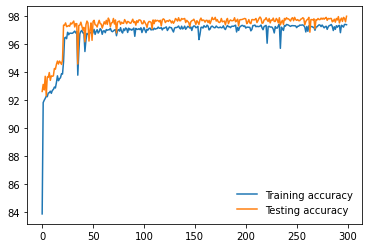

In [ ]:
plt.plot(plottr,label='Training accuracy')
plt.plot(plotts,label='Testing accuracy')
plt.legend(frameon=False)
plt.show()

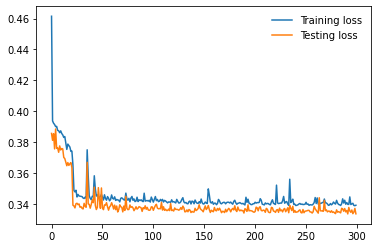

In [ ]:
plt.plot(losstr,label='Training loss')
plt.plot(lossts,label='Testing loss')
plt.legend(frameon=False)
plt.show()

In [ ]:
a=torch.tensor([[1,0],[0,1],[0,1],[1,0],[0,1]])
b=torch.tensor([[0.7,0.3],[0.9,0.4],[0.1,0.7],[0.8,0.5],[0.6,0.8]])
preds = torch.max(b,dim=1)
p=torch.max(a,dim=1)
print(preds)
print(p)
E=torch.tensor(torch.sum(preds[1] == p[1]).item() / len(preds[1]))
print(E)

torch.return_types.max(
values=tensor([0.7000, 0.9000, 0.7000, 0.8000, 0.8000]),
indices=tensor([0, 0, 1, 0, 1]))
torch.return_types.max(
values=tensor([1, 1, 1, 1, 1]),
indices=tensor([0, 1, 1, 0, 1]))
tensor(0.8000)


SAVE MAIN MODEL

In [ ]:
torch.save(mmodel,'/content/drive/MyDrive/NETWORK_INSTRUSION/ofcmodel')

cpu

In [ ]:
mmodel=torch.load('/content/drive/MyDrive/NETWORK_INSTRUSION/ofcmodel')

PREDICTION FUNCTION

In [ ]:
tr=torch.Tensor([1,1,2,0,0,0,0,0,100000,0,100000,0,0,0,0,0,10000,0,0,0,11111111111111,10000000000000,1000000000000,1,0,0,10000,0,100000,0,0,10000000000000,0,0,0,0,0,0,0,0])
tr=tr.to(device)
p=model.geten(tr)
pt=mmodel(p)
if(pt[0]==1):
  print("ANAMOLY")
else:
  print("NORMAL")
print(pt)

NORMAL
tensor([0., 1.], grad_fn=<SoftmaxBackward0>)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
mmodel.eval()

mainm(
  (sath): Sequential(
    (0): Linear(in_features=10, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=30, bias=True)
    (5): ReLU()
    (6): Linear(in_features=30, out_features=30, bias=True)
    (7): ReLU()
    (8): Linear(in_features=30, out_features=30, bias=True)
    (9): ReLU()
    (10): Linear(in_features=30, out_features=30, bias=True)
    (11): ReLU()
    (12): Linear(in_features=30, out_features=10, bias=True)
    (13): ReLU()
    (14): Linear(in_features=10, out_features=5, bias=True)
    (15): ReLU()
    (16): Linear(in_features=5, out_features=2, bias=True)
    (17): Softmax(dim=None)
  )
)